In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from typing import List, Dict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [17]:
songs = pd.read_csv('C:/Users/sarit/Downloads/songdata.csv')
songs.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [18]:
songs = songs.sample(n=5000).drop('link', axis=1).reset_index(drop=True)

songs['text'] = songs['text'].str.replace(r'\n', '')

C:\Users\sarit\AppData\Local\Temp\ipykernel_19276\4145918692.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


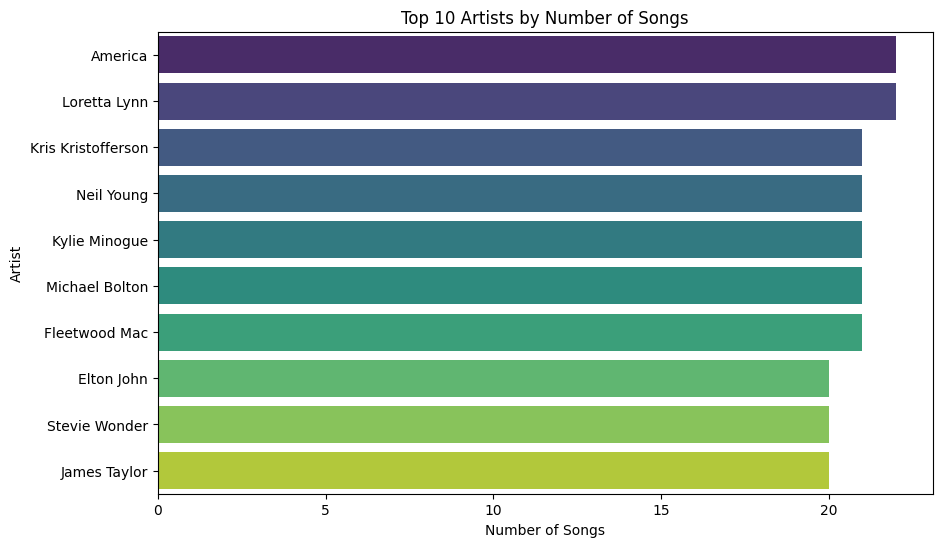

In [19]:
top_artists = songs['artist'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Top 10 Artists by Number of Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.show()

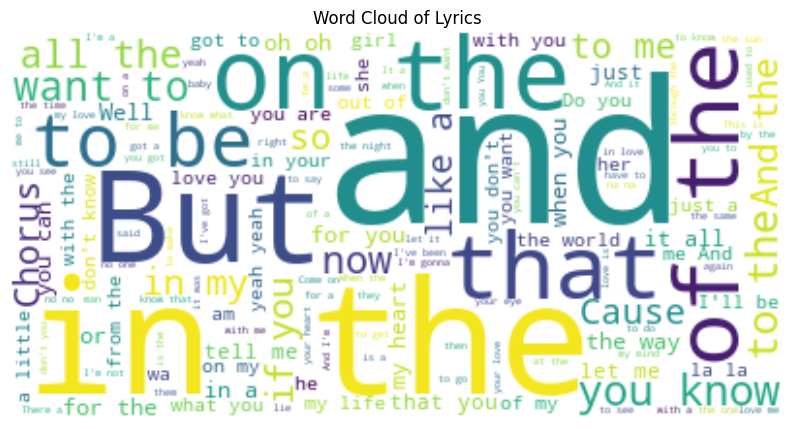

In [20]:
text = " ".join(lyric for lyric in songs.text)
wordcloud = WordCloud(stopwords='english', background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Lyrics')
plt.show()


C:\Users\sarit\AppData\Local\Temp\ipykernel_19276\2201961481.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tfidf_scores['importance'], y=top_tfidf_scores['word'], palette='viridis')


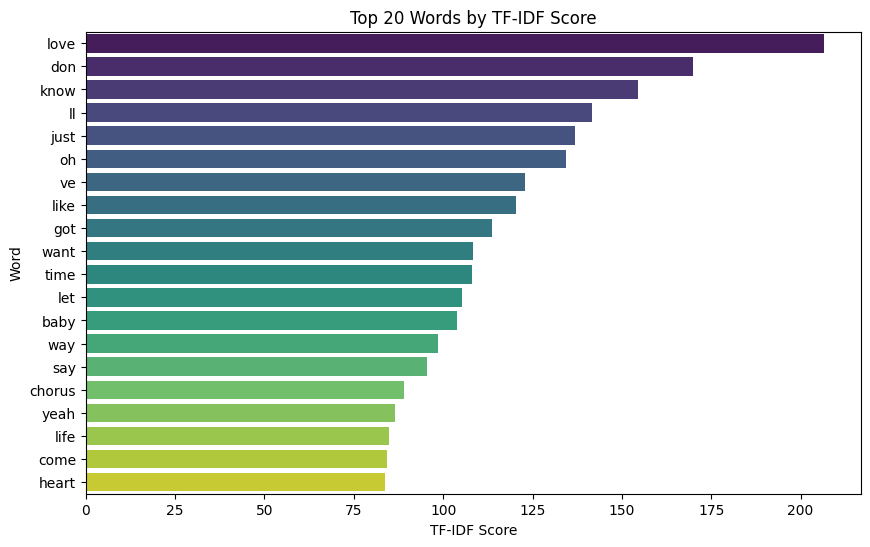

In [21]:
tfidf = TfidfVectorizer(analyzer='word', stop_words='english')
lyrics_matrix = tfidf.fit_transform(songs['text'])
feature_names = tfidf.get_feature_names_out()
importance = np.asarray(lyrics_matrix.sum(axis=0)).flatten()
tfidf_scores = pd.DataFrame({'word': feature_names, 'importance': importance})
top_tfidf_scores = tfidf_scores.sort_values(by='importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_tfidf_scores['importance'], y=top_tfidf_scores['word'], palette='viridis')
plt.title('Top 20 Words by TF-IDF Score')
plt.xlabel('TF-IDF Score')
plt.ylabel('Word')
plt.show()

In [22]:
cosine_similarities = cosine_similarity(lyrics_matrix)
similarities = {}
for i in range(len(cosine_similarities)):
    similar_indices = cosine_similarities[i].argsort()[:-50:-1]
    similarities[songs['song'].iloc[i]] = [(cosine_similarities[i][x], songs['song'][x], songs['artist'][x]) for x in similar_indices][1:]


In [23]:
class ContentBasedRecommender:
    def __init__(self, matrix):
        self.matrix_similar = matrix
        
    def _print_message(self, song, recom_song):
        rec_items = len(recom_song)
        print(f'The {rec_items} recommended songs for {song} are:')
        for i in range(rec_items):
            print(f"Number {i+1}:")
            print(f"{recom_song[i][1]} by {recom_song[i][2]} with {round(recom_song[i][0], 3)} similarity score")
            print("--------------------")

    def recommend(self, recommendation):
        song = recommendation['song']      
        number_songs = recommendation['number_songs']       
        recom_song = self.matrix_similar[song][:number_songs]     
        self._print_message(song=song, recom_song=recom_song)

In [24]:
recommedations = ContentBasedRecommender(similarities)

recommendation = {
    "song": songs['song'].iloc[10],
    "number_songs": 4
}
recommedations.recommend(recommendation)

The 4 recommended songs for Wrap It Up are:
Number 1:
Out Of Time by Ramones with 0.48 similarity score
--------------------
Number 2:
Baby by Justin Bieber with 0.475 similarity score
--------------------
Number 3:
Streetwalker by Michael Jackson with 0.398 similarity score
--------------------
Number 4:
So Much Love by Dusty Springfield with 0.359 similarity score
--------------------


In [25]:
recommendation2 = {
    "song": songs['song'].iloc[120],
    "number_songs": 4
}
recommedations.recommend(recommendation2)

The 4 recommended songs for Ain't It Funny How Time Slips Away are:
Number 1:
Can't Take That Away by Lynyrd Skynyrd with 0.259 similarity score
--------------------
Number 2:
More Today Than Yesterday by Diana Ross with 0.257 similarity score
--------------------
Number 3:
Butterfly by Weezer with 0.253 similarity score
--------------------
Number 4:
Tonight by O.A.R. with 0.231 similarity score
--------------------
